In [1]:
import numpy as np
import pandas as pd

df = pd.read_csv("./data/house_prices.csv",encoding='cp949')
df

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
501,0.06263,0.0,11.93,0,0.573,6.593,69.1,2.4786,1,273,21.0,391.99,9.67,22.4
502,0.04527,0.0,11.93,0,0.573,6.120,76.7,2.2875,1,273,21.0,396.90,9.08,20.6
503,0.06076,0.0,11.93,0,0.573,6.976,91.0,2.1675,1,273,21.0,396.90,5.64,23.9
504,0.10959,0.0,11.93,0,0.573,6.794,89.3,2.3889,1,273,21.0,393.45,6.48,22.0


In [2]:
rm = df[df['RM'] > 7]
rm

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
2,0.02729,0.0,7.07,0,0.4690,7.185,61.1,4.9671,2,242,17.8,392.83,4.03,34.7
4,0.06905,0.0,2.18,0,0.4580,7.147,54.2,6.0622,3,222,18.7,396.90,5.33,36.2
40,0.03359,75.0,2.95,0,0.4280,7.024,15.8,5.4011,3,252,18.3,395.62,1.98,34.9
55,0.01311,90.0,1.22,0,0.4030,7.249,21.9,8.6966,5,226,17.9,395.93,4.81,35.4
64,0.01951,17.5,1.38,0,0.4161,7.104,59.5,9.2229,3,216,18.6,393.24,8.05,33.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
364,3.47428,0.0,18.10,1,0.7180,8.780,82.9,1.9047,24,666,20.2,354.55,5.29,21.9
370,6.53876,0.0,18.10,1,0.6310,7.016,97.5,1.2024,24,666,20.2,392.05,2.96,50.0
375,19.60910,0.0,18.10,0,0.6710,7.313,97.9,1.3163,24,666,20.2,396.90,13.44,15.0
453,8.24809,0.0,18.10,0,0.7130,7.393,99.3,2.4527,24,666,20.2,375.87,16.74,17.8


In [7]:
ptratio = df[df["PTRATIO"]<15] 
ptratio.head(10)

ptratio_rm = df[(df["RM"] > 7) & (df['PTRATIO']<15)]

print(len(ptratio_rm)/len(ptratio))

0.43103448275862066


In [10]:
np.mean(df['RM'])
print(df['RM'].mean())

n = len(df)
sum_x = 0
for i in df['RM'] :
    sum_x += i

mean_rm = sum_x/n
print(mean_rm)

6.284634387351779
6.284634387351787


In [19]:
print(np.var(df['RM'],ddof=1))
print(df['RM'].var(ddof=0))
#numpy는 기본 ddof가 0이구나

print(np.std(df['RM']))
print(df['RM'].std())

scale = 0
for i in df['RM'] :
    scale += (i - mean_rm)**2
print(scale/n) ##분산
print((scale/n)**0.5) ##표준편차


0.49367085022110907
0.49269521612976297
0.7019225143345689
0.7026171434153233
0.49269521612976347
0.7019225143345692


In [21]:
#공분산 만들기
X = df[['CRIM','NOX','RM','AGE','TAX']]
cov_x = np.cov(X,rowvar=0) #열(col)을 세는 옵션 rowvar
cov_x

array([[ 7.39865782e+01,  4.19593894e-01, -1.32503785e+00,
         8.54053223e+01,  8.44821538e+02],
       [ 4.19593894e-01,  1.34276357e-02, -2.46034495e-02,
         2.38592720e+00,  1.30462855e+01],
       [-1.32503785e+00, -2.46034495e-02,  4.93670850e-01,
        -4.75192919e+00, -3.45834478e+01],
       [ 8.54053223e+01,  2.38592720e+00, -4.75192919e+00,
         7.92358399e+02,  2.40269012e+03],
       [ 8.44821538e+02,  1.30462855e+01, -3.45834478e+01,
         2.40269012e+03,  2.84047595e+04]])

In [23]:
cov_x = np.cov(X.T) #.T < 전치행렬
print(cov_x)

cov_x = X.cov()
print(cov_x)

[[ 7.39865782e+01  4.19593894e-01 -1.32503785e+00  8.54053223e+01
   8.44821538e+02]
 [ 4.19593894e-01  1.34276357e-02 -2.46034495e-02  2.38592720e+00
   1.30462855e+01]
 [-1.32503785e+00 -2.46034495e-02  4.93670850e-01 -4.75192919e+00
  -3.45834478e+01]
 [ 8.54053223e+01  2.38592720e+00 -4.75192919e+00  7.92358399e+02
   2.40269012e+03]
 [ 8.44821538e+02  1.30462855e+01 -3.45834478e+01  2.40269012e+03
   2.84047595e+04]]
            CRIM        NOX         RM          AGE           TAX
CRIM   73.986578   0.419594  -1.325038    85.405322    844.821538
NOX     0.419594   0.013428  -0.024603     2.385927     13.046286
RM     -1.325038  -0.024603   0.493671    -4.751929    -34.583448
AGE    85.405322   2.385927  -4.751929   792.358399   2402.690122
TAX   844.821538  13.046286 -34.583448  2402.690122  28404.759488


[[ 1.          0.42097171 -0.2192467   0.35273425  0.58276431]
 [ 0.42097171  1.         -0.30218819  0.7314701   0.6680232 ]
 [-0.2192467  -0.30218819  1.         -0.24026493 -0.29204783]
 [ 0.35273425  0.7314701  -0.24026493  1.          0.50645559]
 [ 0.58276431  0.6680232  -0.29204783  0.50645559  1.        ]]


<Axes: >

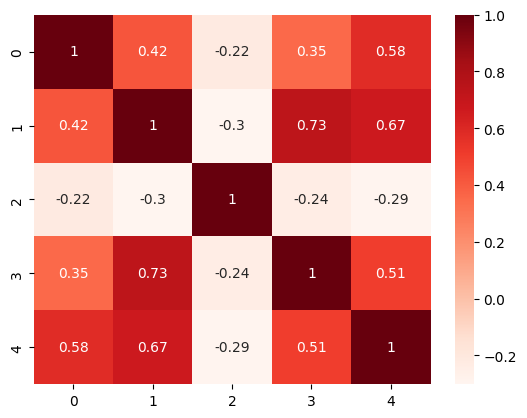

In [25]:
corr_x = np.corrcoef(X.T)
print(corr_x)

import seaborn as sns
sns.heatmap(corr_x, annot=True, cmap='Reds')

<Axes: xlabel='AGE', ylabel='TAX'>

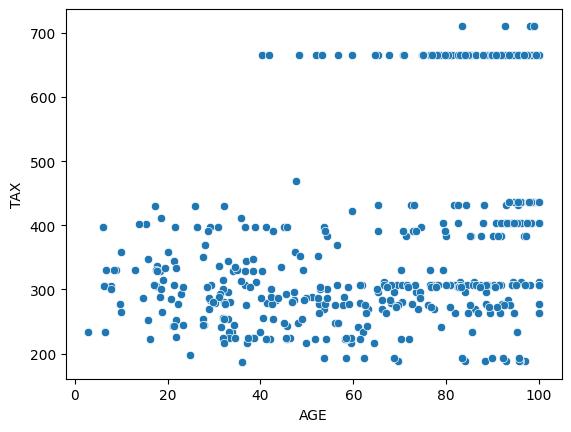

In [32]:
sns.scatterplot(data=df,x='AGE',y='TAX')

<Axes: xlabel='ACHIEVEMENT', ylabel='Count'>

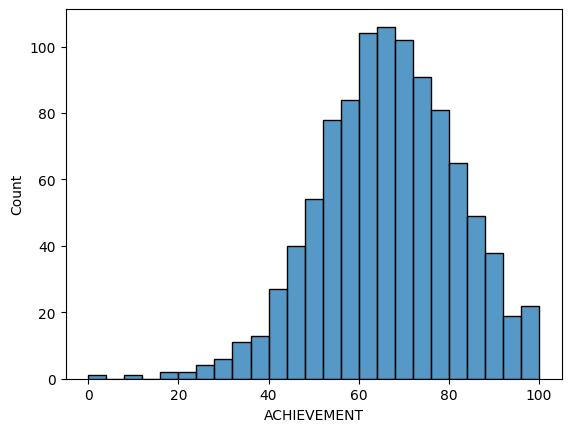

In [35]:
import seaborn as sns

df_2 = pd.read_csv("./data/performance.csv")
sns.histplot(data=df_2,x="ACHIEVEMENT")

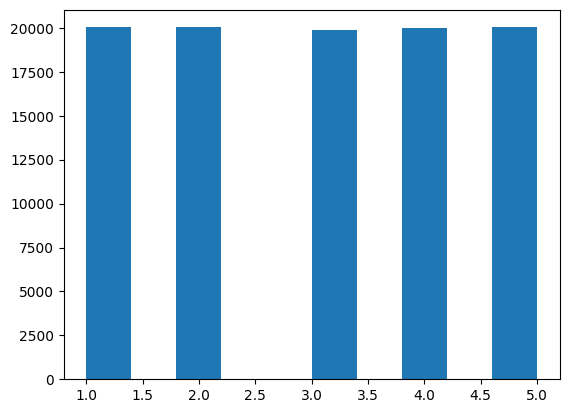

In [50]:
from matplotlib import pyplot as plt
x = np.random.randint(low=1,high=6,size=100000)

plt.hist(x,bins=10,align='mid')
plt.show()

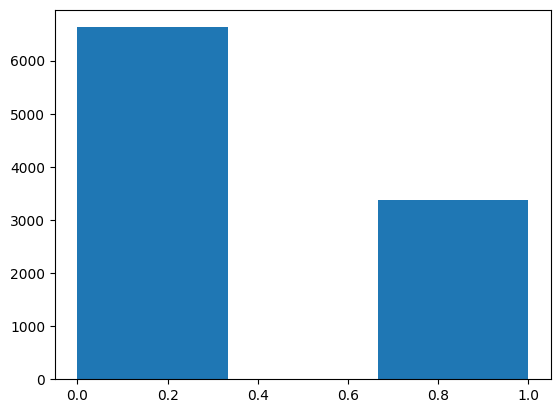

In [48]:
x = np.random.binomial(n=1,p=1/3,size=10000)
plt.hist(x,bins=3)
plt.show()

[3 4 3 ... 2 2 4]


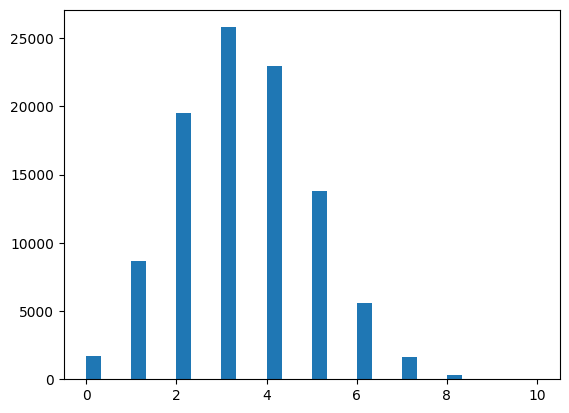

In [54]:
x = np.random.binomial(n=10,p=1/3,size=100000)
print(x)
plt.hist(x,bins=30)
plt.show()

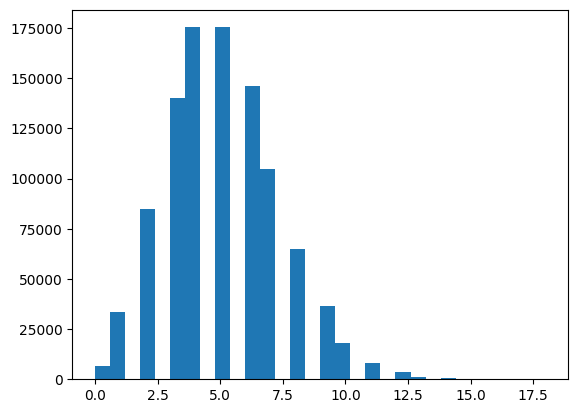

In [61]:
x = np.random.poisson(lam=5,size=1000000) #lam == lambda값, 평균, 분산
plt.hist(x,bins=30)
plt.show()

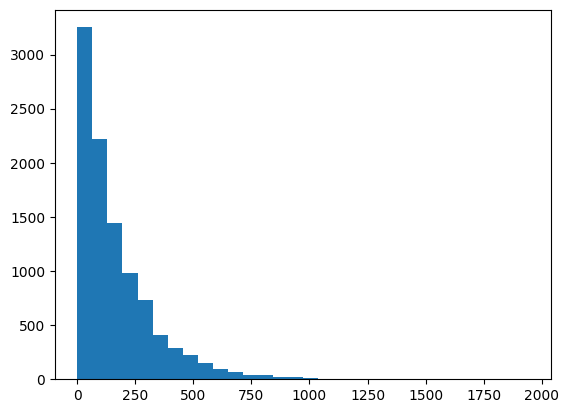

In [68]:
#기하 분포(geometric distribution)
x = np.random.geometric(p=0.006, size=10000)
plt.hist(x, bins=30)
plt.show()

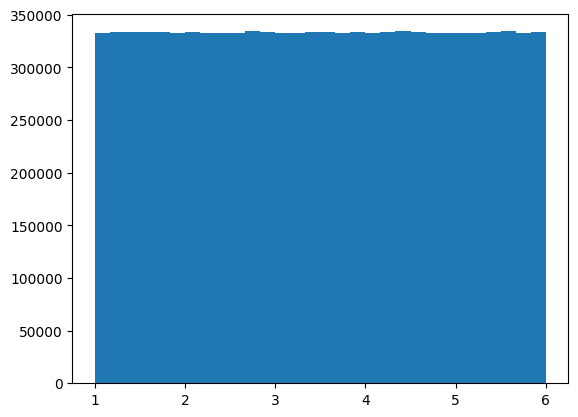

In [73]:
# 연속형 균일분포
x= np.random.uniform(low=1,high=6,size=10000000) #size 늘릴수록 값이 균일해진다.
plt.hist(x,bins=30)
plt.show()

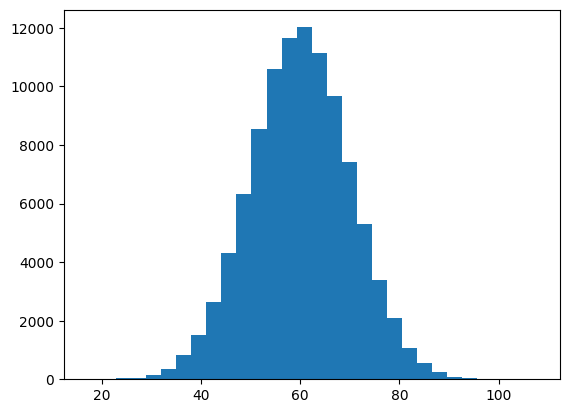

In [75]:
#loc(위치값, 평균) scale(표준편차)

x = np.random.normal(loc=60,scale=10,size=100000)
plt.hist(x,bins=30)
plt.show()

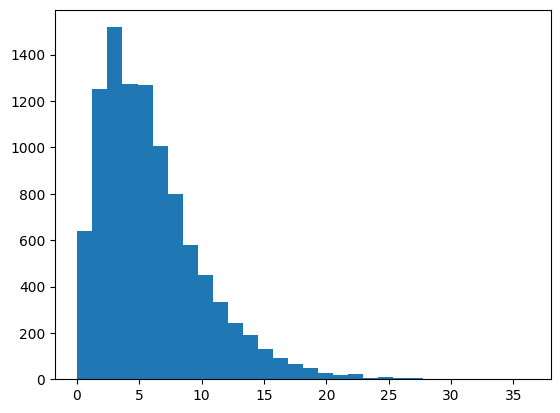

In [76]:
x = np.random.gamma(shape=2, scale=3, size=10000)
plt.hist(x,bins=30)
plt.show()

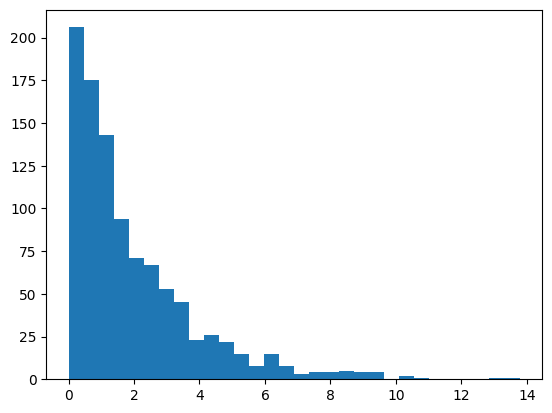

In [77]:
## 감마 분포에서 지수가 1인 경우 지수 분포

x = np.random.exponential(scale=2,size=1000)
plt.hist(x,bins=30)
plt.show()

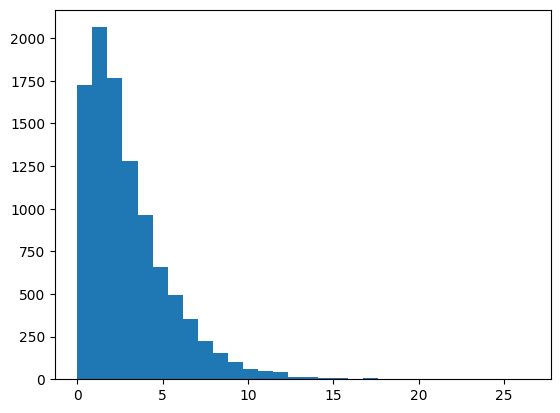

In [79]:
#카이제곱 분포
x = np.random.chisquare(df=3, size=10000)
plt.hist(x,bins=30)
plt.show()

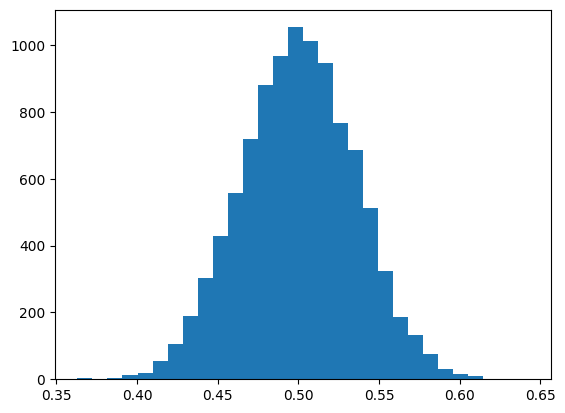

In [89]:
## 베타 분포

x = np.random.beta(a=100,b=100,size=10000) #alpha, beta 값에 따라 쏠리는 정도가 달라지네

plt.hist(x,bins=30)
plt.show()